In [1]:
from util_funcs import analytic_sol
from HeatEqNN import HeatEqNN

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
import keras

from plotting import set_plot_params

2025-12-18 16:40:10.456978: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-18 16:40:10.506320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 16:40:11.817408: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


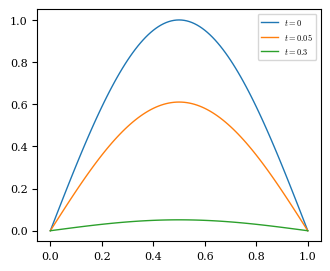

In [2]:
set_plot_params()

x10 = np.linspace(0, 1, 11)
x100 = np.linspace(0,1,101)
x1000 = np.linspace(0,1,1001)

ts_plot = [0, 0.05, 0.3]

x100_grid, t_grid = np.meshgrid(x100, ts_plot)
x10_grid, t_grid10 = np.meshgrid(x10, ts_plot)

points = np.vstack([x100, t_grid[0]])
a_sol_init = analytic_sol(points)


points = np.vstack([x100, t_grid[1]])
a_sol_t1 = analytic_sol(points)

points = np.vstack([x100, t_grid[2]])
a_sol_t2 = analytic_sol(points)

a_sols = np.append(a_sol_t1, a_sol_t2)


points = np.vstack([x10, t_grid10[1]])
a_sol10_t1 = analytic_sol(points)

points = np.vstack([x10, t_grid10[2]])
a_sol10_t2 = analytic_sol(points)


plt.plot(x100, a_sol_init, label = r"$t=0$")

plt.plot(x100, a_sol_t1, label = r"$t=0.05$")

plt.plot(x100, a_sol_t2, label = r"$t=0.3$")

plt.legend()
plt.show()

In [3]:
keras.utils.set_random_seed(2025)

its = 5000
num_points = 100

act_func = "silu"
nodes = 60
num_layers = 4
reg = None
reg_param = 0
learning_rate = 0.0001

x100 = np.linspace(0,1,101)
ts_plot = [0, 0.05, 0.3]

ts1_100 = np.ones_like(x100)*ts_plot[1]
ts2_100 = np.ones_like(x100)*ts_plot[2]

pred_t1 = np.vstack([x100, ts1_100]).T
pred_t2 = np.vstack([x100, ts2_100]).T
pred_points = np.vstack([pred_t1, pred_t2])

#x_train = np.linspace(0,1,10)
#t_train = np.linspace(0,0.5,10)
#xs, ts = np.meshgrid(x_train, t_train)
#train_points = np.vstack([xs.ravel(), ts.ravel()]).T

x_train = np.random.uniform(0,1, num_points)
t_train = np.random.uniform(0,0.3, num_points)

train_points = np.vstack([x_train, t_train]).T

NN = HeatEqNN(num_layers, nodes, act_func, regularizer=reg,
              reg_param=reg_param, learning_rate = learning_rate)
mse_array4 = np.zeros(its)
for i in range(its):
    NN.train(train_points, epochs=1)
    pred = NN.predict(pred_points)
    mse_array4[i] = mse(pred, a_sols)
    if (i+1) % 1000 == 0:
        print(f"Epoch: {i+1}", f"MSE: {mse_array4[i]}")

2025-12-18 16:40:13.385496: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch: 1000 MSE: 0.013435260647615953
Epoch: 2000 MSE: 0.0007771139128747255
Epoch: 3000 MSE: 0.0002779246986795026
Epoch: 4000 MSE: 4.5493183545428706e-05
Epoch: 5000 MSE: 9.375599047540998e-06


In [4]:
keras.utils.set_random_seed(2025)

its = 5000
num_points = 100

act_func = "silu"
nodes = 60
num_layers = 4
reg = None
reg_param = 0
learning_rate = 0.001

x100 = np.linspace(0,1,101)
ts_plot = [0, 0.05, 0.3]

ts1_100 = np.ones_like(x100)*ts_plot[1]
ts2_100 = np.ones_like(x100)*ts_plot[2]

pred_t1 = np.vstack([x100, ts1_100]).T
pred_t2 = np.vstack([x100, ts2_100]).T
pred_points = np.vstack([pred_t1, pred_t2])

x_train = np.linspace(0,1,10)
t_train = np.linspace(0,0.5,10)
xs, ts = np.meshgrid(x_train, t_train)
train_points = np.vstack([xs.ravel(), ts.ravel()]).T

#x_train = np.random.uniform(0,1, num_points)
#t_train = np.random.uniform(0,0.3, num_points)
#train_points = np.vstack([x_train, t_train]).T

NN = HeatEqNN(num_layers, nodes, act_func, regularizer=reg,
              reg_param=reg_param, learning_rate = learning_rate)
mse_array3 = np.zeros(its)
for i in range(its):
    NN.train(train_points, epochs=1)
    pred = NN.predict(pred_points)
    mse_array3[i] = mse(pred, a_sols)
    if (i+1) % 1000 == 0:
        print(f"Epoch: {i+1}", f"MSE: {mse_array3[i]}")

Epoch: 1000 MSE: 4.503971704754357e-06
Epoch: 2000 MSE: 5.556316568496599e-06
Epoch: 3000 MSE: 1.3242732039053828e-06
Epoch: 4000 MSE: 9.747682658721777e-07
Epoch: 5000 MSE: 7.434505555799302e-07


In [5]:
keras.utils.set_random_seed(2025)

its = 5000
num_points = 100

act_func = "silu"
nodes = 60
num_layers = 4
reg = None
reg_param = 0
learning_rate = 0.01

x100 = np.linspace(0,1,101)
ts_plot = [0, 0.05, 0.3]

ts1_100 = np.ones_like(x100)*ts_plot[1]
ts2_100 = np.ones_like(x100)*ts_plot[2]

pred_t1 = np.vstack([x100, ts1_100]).T
pred_t2 = np.vstack([x100, ts2_100]).T
pred_points = np.vstack([pred_t1, pred_t2])

x_train = np.linspace(0,1,10)
t_train = np.linspace(0,0.5,10)
xs, ts = np.meshgrid(x_train, t_train)
train_points = np.vstack([xs.ravel(), ts.ravel()]).T

#x_train = np.random.uniform(0,1, num_points)
#t_train = np.random.uniform(0,0.3, num_points)
#train_points = np.vstack([x_train, t_train]).T

NN = HeatEqNN(num_layers, nodes, act_func, regularizer=reg,
              reg_param=reg_param, learning_rate = learning_rate)
mse_array2 = np.zeros(its)
for i in range(its):
    NN.train(train_points, epochs=1)
    pred = NN.predict(pred_points)
    mse_array2[i] = mse(pred, a_sols)
    if (i+1) % 1000 == 0:
        print(f"Epoch: {i+1}", f"MSE: {mse_array2[i]}")

Epoch: 1000 MSE: 2.2744292351262054e-06
Epoch: 2000 MSE: 7.243794828627672e-05
Epoch: 3000 MSE: 1.6807245146412332e-06
Epoch: 4000 MSE: 4.169799001912828e-06
Epoch: 5000 MSE: 1.3220588492112228e-06


In [6]:
keras.utils.set_random_seed(2025)

its = 5000
num_points = 100

act_func = "silu"
nodes = 60
num_layers = 4
reg = None
reg_param = 0
learning_rate = 0.1

x100 = np.linspace(0,1,101)
ts_plot = [0, 0.05, 0.3]

ts1_100 = np.ones_like(x100)*ts_plot[1]
ts2_100 = np.ones_like(x100)*ts_plot[2]

pred_t1 = np.vstack([x100, ts1_100]).T
pred_t2 = np.vstack([x100, ts2_100]).T
pred_points = np.vstack([pred_t1, pred_t2])

x_train = np.linspace(0,1,10)
t_train = np.linspace(0,0.5,10)
xs, ts = np.meshgrid(x_train, t_train)
train_points = np.vstack([xs.ravel(), ts.ravel()]).T

#x_train = np.random.uniform(0,1, num_points)
#t_train = np.random.uniform(0,0.3, num_points)
#train_points = np.vstack([x_train, t_train]).T

NN = HeatEqNN(num_layers, nodes, act_func, regularizer=reg,
              reg_param=reg_param, learning_rate = learning_rate)
mse_array1 = np.zeros(its)
for i in range(its):
    NN.train(train_points, epochs=1)
    pred = NN.predict(pred_points)
    mse_array1[i] = mse(pred, a_sols)
    if (i+1) % 1000 == 0:
        print(f"Epoch: {i+1}", f"MSE: {mse_array1[i]}")

Epoch: 1000 MSE: 0.04477011812974903
Epoch: 2000 MSE: 0.04477011812974902
Epoch: 3000 MSE: 0.044770118129748994
Epoch: 4000 MSE: 0.044770118129748994
Epoch: 5000 MSE: 0.044770118129748994


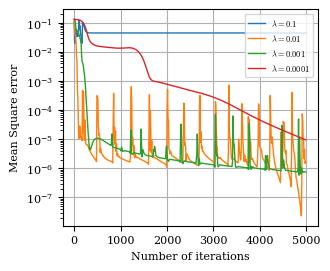

In [14]:
its_plot = np.arange(1, its+1, 1)

set_plot_params()

every_n = 10
plt.grid()

plt.semilogy(its_plot[::every_n], mse_array1[::every_n], label = r"$\lambda = 0.1$")
plt.semilogy(its_plot[::every_n], mse_array2[::every_n], label = r"$\lambda = 0.01$")
plt.semilogy(its_plot[::every_n], mse_array3[::every_n], label = r"$\lambda = 0.001$")
plt.semilogy(its_plot[::every_n], mse_array4[::every_n], label = r"$\lambda = 0.0001$")
plt.xlabel("Number of iterations")
plt.ylabel("Mean Square error")

plt.legend(loc="upper right")
plt.savefig("../fig/mse_vs_its_for_learning_rates.pdf")
plt.show()

(101, 2)


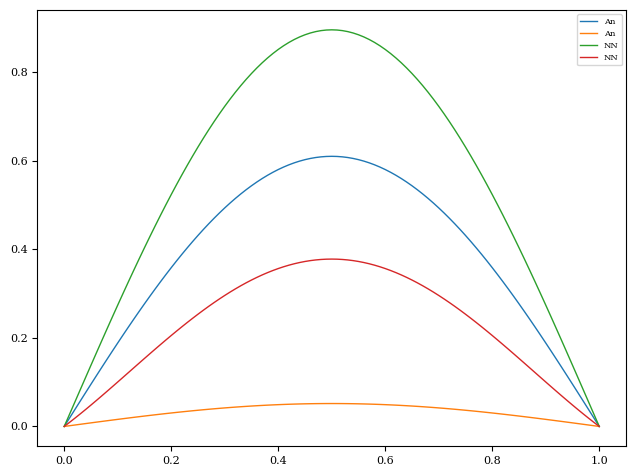

In [10]:
prediction_t1 = NN.predict(pred_t1)
prediction_t2 = NN.predict(pred_t2)
print(np.shape(pred_t2))

plt.plot(x100, a_sol_t1, label = "An")
plt.plot(x100, a_sol_t2, label = "An")
plt.plot(x100, prediction_t1, label= "NN")
plt.plot(x100, prediction_t2, label = "NN")

plt.legend()
plt.show()